In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step1. Data Preperation

In [6]:
df = pd.read_csv('mnist_train.csv')

In [7]:
df.shape

(60000, 785)

In [8]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [15]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data = df.values

In [18]:
print(data.shape)

(60000, 785)


In [19]:
print(type(data))

<class 'numpy.ndarray'>


In [21]:
X = data[:,1:]
Y = data[:,0]

In [23]:
X.shape

(60000, 784)

In [24]:
Y.shape

(60000,)

In [30]:
split= int(0.8*X.shape[0])

In [31]:
split

48000

In [32]:
X_train=X[:split,:]
Y_train=Y[:split ]
X_test=X[split: ,:]
Y_test=Y[split: ]

## Visualize

5


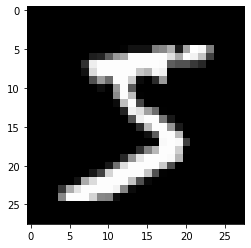

In [33]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show
drawImg(X_train[0])
print(Y_train[0])

# Step2. K-NN 

In [35]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,querypoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(querypoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

# Make Predictions

In [37]:
pred = knn(X_train,Y_train,X_test[0])
print(int(pred))

4


4


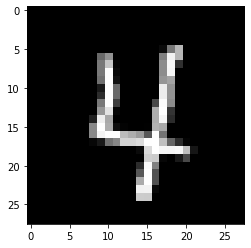

In [40]:
drawImg(X_test[0])
print(Y_test[0])